In [87]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel("refr_excel.xlsx")
df.columns = ['omega', 'n_res']
df.head()

,omega,n_res
0,175.00056,-0.000059
1,175.00086,-0.000059
2,175.00116,-0.000059
3,175.00146,-0.000059
4,175.00176,-0.000059


In [88]:
omega = np.array(df["omega"]) * 2*np.pi * 10**12
n_res = np.array(df["n_res"])
omega

array([1.09956095e+15, 1.09956283e+15, 1.09956472e+15, ...,
       1.82211909e+15, 1.82212097e+15, 1.82212286e+15])

In [89]:
A = 7.97 * 10**-3     #коэффициенты метода Коши
B = 2.232 * 10**-35   #коэффициенты метода Коши
c = 2.99792458 * 10**10        #скорость света в см/с
n = 1 + A + B * omega**2  + n_res
k = n*omega/c
lambd = 2*np.pi*c/omega * 10**4   #в микронах
np.size(k)

383332

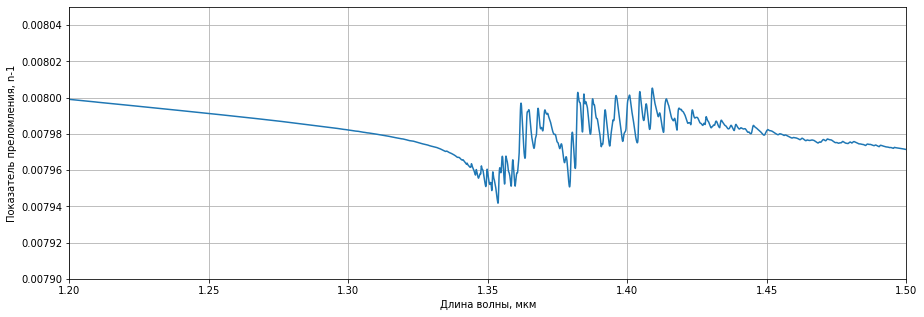

In [90]:
plt.figure(figsize=(15,5))
plt.plot(lambd, n-1)
plt.xlim([1.2,1.5])
plt.ylim([0.0079, 0.00805])
plt.xlabel('Длина волны, мкм')
plt.ylabel('Показатель преломления, n-1')
plt.grid()
plt.show()

In [91]:
np.size(k)
print(k[2000], '  ', 2*k[1000],'  ', k[0],'  ', omega[2000], '  ', omega[1000])

37095.3371350143    74063.88490387176    36968.54500305967    1103330858524507.5    1101445902932353.6


In [92]:
#Ищем k_2
k_2 = np.zeros(np.size(k))
for i  in range(5000, np.size(k)-5000, 5000):
  k_2[i] = (k[i+5000] - 2*k[i] + k[i-5000]) / (omega[i+5000] - omega[i])**2

In [93]:
#Ищем k_2
step = 5000
k_2 = np.zeros(np.size(k))
for i  in range(1, np.size(k)-1, 1):
  k_2[i] = (k[i+1] - 2*k[i] + k[i-1]) / (omega[i+1] - omega[i])**2 / step**2

отсюда компилить

In [94]:
step=4150
ind1=1
ind2=1
k_smoothed=[]
lambd_sm = []
while ind1<=np.size(k):
  k_smoothed.append(k[ind1])
  lambd_sm.append(lambd[ind1])
  ind1=ind1+step
  # ind2=ind2+1
# k_smoothed

In [95]:
k_2 = np.zeros(np.size(k_smoothed))
for i  in range(1, np.size(k_smoothed)-1, 1):
  k_2[i] = (k_smoothed[i+1] - 2*k_smoothed[i] + k_smoothed[i-1]) / (omega[i+1] - omega[i])**2 / step**2

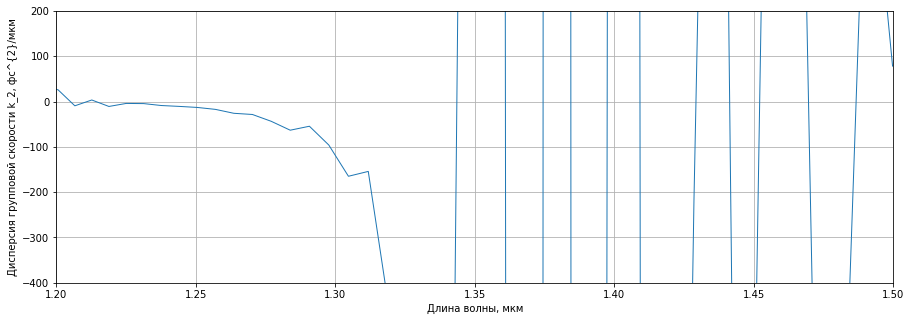

In [96]:
plt.figure(figsize=(15,5))
plt.plot(lambd_sm, k_2 * 10**30, linewidth = 1)
plt.xlim([1.2,1.5])
plt.ylim([-400, 200])
# plt.title('Численное решение')
plt.xlabel('Длина волны, мкм')
plt.ylabel('Дисперсия групповой скорости k_2, фс^{2}/мкм')
plt.grid()
plt.show()